<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/informe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado óptimo

Procesamiento Adaptativo de Señales Aleatorias

© 2019 Parra, Rocío

© 2019 Fernandez, Lucero Guadalupe

In [0]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


##1. Cargamos datos

###Muestras

In [0]:
#cargo datos
fs_music, music = wavfile.read('lorde.wav')
fs_voice, voice = wavfile.read('sofunny.wav')
fs_square, square = wavfile.read('cuadrada.wav')
fs_lin, lin = wavfile.read('sweeplin.wav')
fs_log, log = wavfile.read('sweeplog.wav')
fs_noise, noise = wavfile.read('ruido.wav')

#vectores de tiempo
t_music = np.linspace(0,len(music)/fs_music, len(music))
t_voice = np.linspace(0,len(voice)/fs_voice, len(voice))
t_square = np.linspace(0,len(square)/fs_square, len(square))
t_lin = np.linspace(0,len(lin)/fs_lin, len(lin))
t_log = np.linspace(0,len(log)/fs_log, len(log))
t_noise = np.linspace(0,len(noise)/fs_noise, len(noise))

###Grabaciones

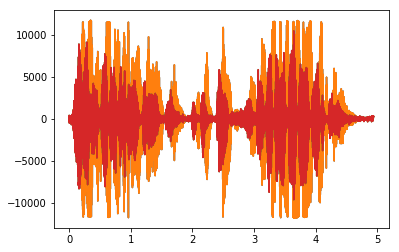

In [39]:
#cargo datos
fs_music_r, music_r = wavfile.read('grab-lorde.wav')
fs_voice_r, voice_r = wavfile.read('grab-sofunny.wav')
fs_square_r, square_r = wavfile.read('grab-cuadrada.wav')
fs_lin_r, lin_r = wavfile.read('grab-sweeplin.wav')
fs_log_r, log_r = wavfile.read('grab-sweeplog.wav')
fs_noise_r, noise_r = wavfile.read('grab-ruido.wav')

#vectores de tiempo
t_music_r = np.linspace(0,len(music_r)/fs_music_r, len(music_r))
t_voice_r = np.linspace(0,len(voice_r)/fs_voice_r, len(voice_r))
t_square_r = np.linspace(0,len(square_r)/fs_square_r, len(square_r))
t_lin_r = np.linspace(0,len(lin_r)/fs_lin_r, len(lin_r))
t_log_r = np.linspace(0,len(log_r)/fs_log_r, len(log_r))
t_noise_r = np.linspace(0,len(noise_r)/fs_noise_r, len(noise_r))

plt.figure()
plt.plot(t_voice, voice)
plt.plot(t_voice_r[len(t_voice_r)//5:]-t_voice_r[len(t_voice_r)//5], voice_r[len(t_voice_r)//5:])
plt.show()